In [8]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle
import warnings
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [9]:
zip_file_path = 'Dutch_data_processed_onehot.zip'
csv_file_inside_zip = 'Dutch_data_processed_onehot'

In [10]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [11]:
warnings.filterwarnings("ignore")

In [12]:
df

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Year,Month,Weekday,...,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits,Household_composition_Couple,Household_composition_Couple and kids,Household_composition_One person household,Household_composition_Other,Education_Higher education,Education_Other,Education_Secondary
0,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,0,0,1,0,0,0,1
1,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,0,0,1,0,0,0,1
2,1,1,42,1,1,0,0,2018,1,6,...,0,0,1,0,0,1,0,0,0,1
3,2,1,42,1,1,0,0,2018,1,5,...,0,0,0,1,0,0,0,0,0,1
4,2,1,42,1,1,0,0,2018,1,5,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
558807,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
558808,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
558809,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0


In [13]:
drops = ["Mode"]
X = df.drop(drops, axis=1)

<Axes: >

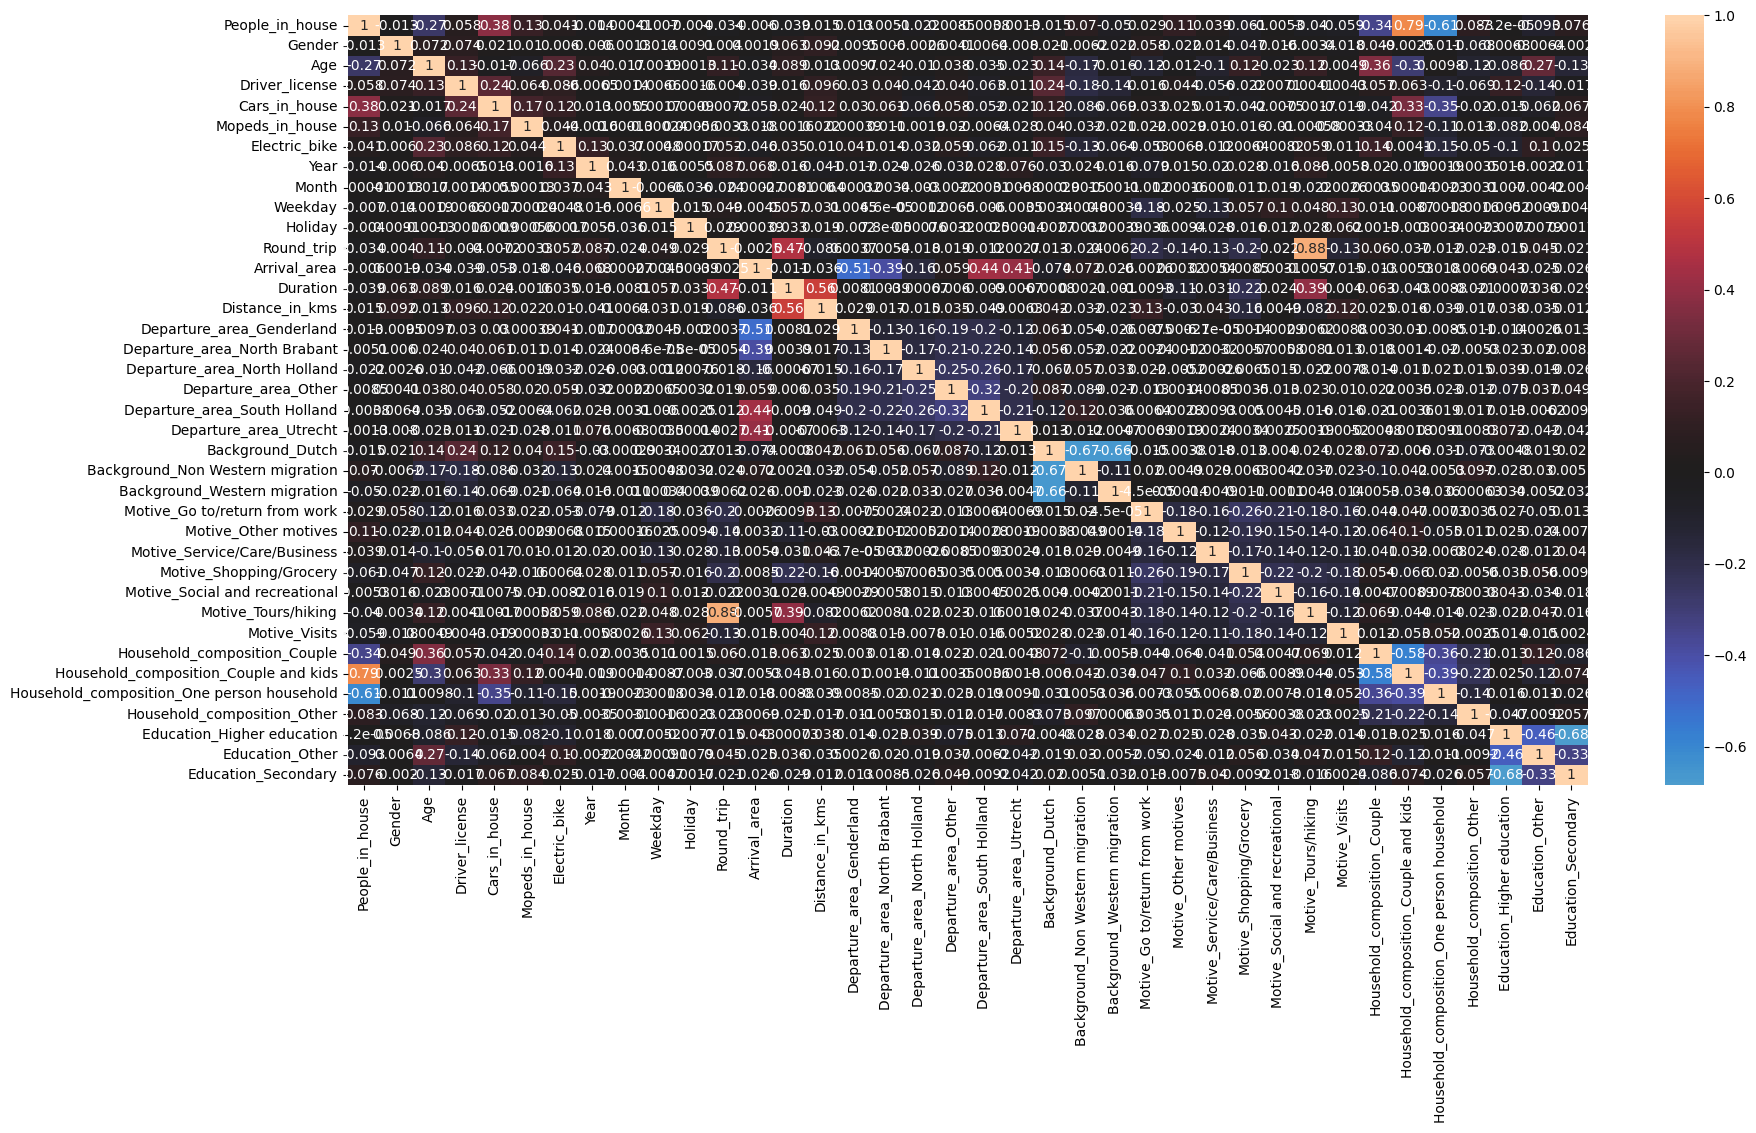

In [14]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [15]:
drops = ["Mode", "Arrival_area", "Year"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [16]:
df_with_constant = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                                      Variable       VIF
0                                        const  0.000000
1                              People_in_house  4.372999
2                                       Gender  1.028769
3                                          Age  1.423788
4                               Driver_license  1.188852
5                                Cars_in_house  1.330743
6                              Mopeds_in_house  1.052426
7                                Electric_bike  1.121664
8                                        Month  1.004474
9                                      Weekday  1.084220
10                                     Holiday  1.008452
11                                  Round_trip  5.714444
12                                    Duration  2.479567
13                             Distance_in_kms  1.997949
14                   Departure_area_Genderland       inf
15                Departure_area_North Brabant       inf
16                Departure_are

In [17]:
drops = ["Mode", "Arrival_area", "Year", "Motive_Tours/hiking"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [18]:
df_with_constant = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                                      Variable       VIF
0                                        const  0.000000
1                              People_in_house  4.372999
2                                       Gender  1.028769
3                                          Age  1.423788
4                               Driver_license  1.188852
5                                Cars_in_house  1.330743
6                              Mopeds_in_house  1.052426
7                                Electric_bike  1.121664
8                                        Month  1.004474
9                                      Weekday  1.084220
10                                     Holiday  1.008452
11                                  Round_trip  5.714444
12                                    Duration  2.479567
13                             Distance_in_kms  1.997949
14                   Departure_area_Genderland       inf
15                Departure_area_North Brabant       inf
16                Departure_are

In [19]:
drops = ["Mode", "Arrival_area", "Year", "Motive_Tours/hiking", "Household_composition_Couple and kids",
        'Education_Secondary', 'Background_Non Western migration', 'Departure_area_Other']
X = df.drop(drops, axis=1)
y = df["Mode"]
df_with_constant = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                                      Variable         VIF
0                                        const  125.753776
1                              People_in_house    4.372999
2                                       Gender    1.028769
3                                          Age    1.423788
4                               Driver_license    1.188852
5                                Cars_in_house    1.330743
6                              Mopeds_in_house    1.052426
7                                Electric_bike    1.121664
8                                        Month    1.004474
9                                      Weekday    1.084220
10                                     Holiday    1.008452
11                                  Round_trip    5.714444
12                                    Duration    2.479567
13                             Distance_in_kms    1.997949
14                   Departure_area_Genderland    1.295398
15                Departure_area_North Brabant    1.3383

Those are the final features that we will use

In [20]:
X.shape

(558811, 31)

In [27]:
drops = ["Mode", "Arrival_area", "Year", "Motive_Tours/hiking", "Household_composition_Couple and kids",
        'Education_Secondary', 'Background_Non Western migration', 'Departure_area_Other']
X = df.drop(drops, axis=1)
y = df["Mode"]

In [28]:
X, y = shuffle(X, y, random_state=42)

In [29]:
X.shape

(692055, 30)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state =42, stratify=y)

In [31]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    285384
1    159141
2    156174
3     22150
Name: count, dtype: int64

Class counts in y_test:
Mode
0    31710
1    17682
2    17353
3     2461
Name: count, dtype: int64


In [32]:
X_train.shape, X_test.shape

((622849, 30), (69206, 30))

In [33]:
X_train

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,...,Background_Western migration,Motive_Go to/return from work,Motive_Other,Motive_Social and recreational,Motive_Visits,Household_composition_Couple,Household_composition_One person household,Household_composition_Other,Education_Higher education,Education_Other
101888,1,0,22,0,0,0,0,9,4,0,...,1,0,1,0,0,0,1,0,1,0
360277,2,0,65,1,2,0,0,10,1,0,...,1,0,0,1,0,1,0,0,0,0
185930,4,1,48,1,8,1,0,6,3,0,...,0,0,0,1,0,0,0,0,1,0
186691,1,1,30,1,1,1,0,6,5,0,...,0,1,0,0,0,0,1,0,1,0
538634,3,1,19,0,0,0,0,12,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544553,2,0,34,1,1,0,0,8,5,0,...,0,1,0,0,0,1,0,0,1,0
550380,2,0,64,1,1,0,1,5,4,1,...,0,0,0,0,0,1,0,0,0,1
549758,2,0,28,1,1,0,0,8,3,0,...,0,1,0,0,0,1,0,0,1,0
321888,2,1,84,1,1,0,1,5,2,0,...,0,0,0,0,1,1,0,0,0,0


# Logistic Regression

In [59]:
pipeline = Pipeline(steps = [
    ('scaler', MinMaxScaler()),
    ('sampler', RandomUnderSampler(random_state=42, sampling_strategy="auto")),
    ('classifier', LogisticRegression(multi_class='ovr'))
])

In [60]:
param_grid = {'classifier__solver' : ['liblinear', 'lbfgs'],
              'classifier__max_iter': [400]}
grid_search_log = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_log.fit(X_train, y_train)
log_params = grid_search_log.best_params_
print(log_params)

{'classifier__max_iter': 400, 'classifier__solver': 'liblinear'}


In [61]:
score = grid_search_log.best_score_
score

0.5423843877522392

In [62]:
logreg_model = grid_search_log.best_estimator_
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.87      0.68      0.77     31710
           1       0.50      0.48      0.49     17682
           2       0.72      0.67      0.70     17353
           3       0.14      0.65      0.24      2461

    accuracy                           0.63     69206
   macro avg       0.56      0.62      0.55     69206
weighted avg       0.71      0.63      0.66     69206



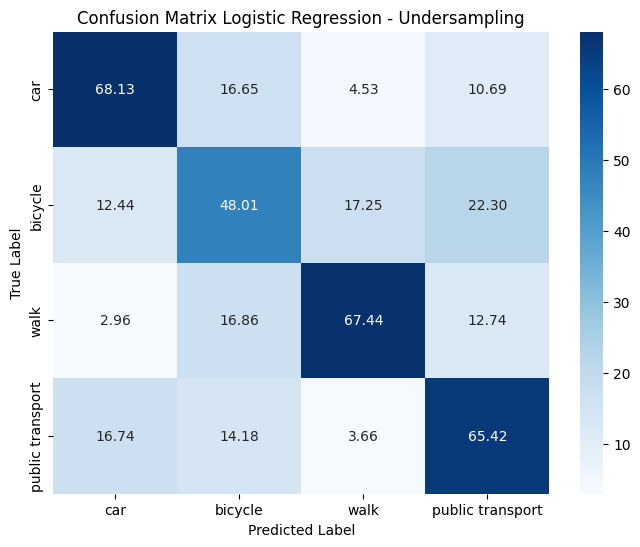

In [63]:
class_labels = ["car", "bicycle", "walk", "public transport"]
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_log) / conf_matrix_log.sum(axis=1)
conf_matrix_percentages_log = (conf_matrix_log.T / conf_matrix_log.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_log, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression - Undersampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [64]:
class_labels_mapping = {
    0: 'car',
    1: 'bike',
    2: 'walk',
    3: 'public transport'
}

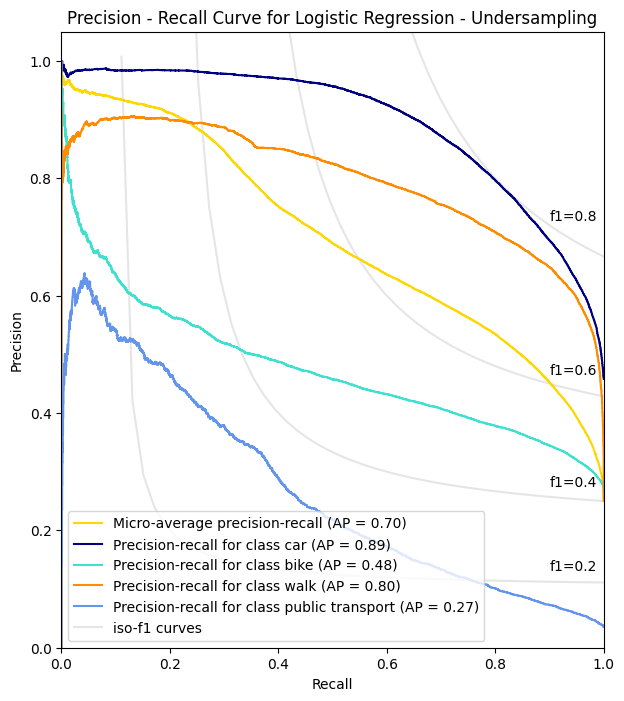

In [65]:
class_probabilities_log = logreg_model.predict_proba(X_test)
y_pred_prob_log = np.argmax(class_probabilities_log, axis=1)
y_test_bin_log = label_binarize(y_test, classes=logreg_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(logreg_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_log[:, i], class_probabilities_log[:, i])
    average_precision[i] = average_precision_score(y_test_bin_log[:, i], class_probabilities_log[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_log.ravel(), class_probabilities_log.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_log, class_probabilities_log, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Logistic Regression - Undersampling")

plt.show()

In [66]:
lclassifier1 = logreg_model.named_steps['classifier']
coefficients = lclassifier1.coef_
coefficients_df = pd.DataFrame(coefficients, columns=X.columns)
coefficients_df = coefficients_df.transpose()
print("Coefficients for each class:")
print(coefficients_df)

Coefficients for each class:
                                                    0          1          2  \
People_in_house                             -0.316204   0.786966  -0.102110   
Gender                                       0.051717   0.019879   0.087838   
Age                                          1.793858   0.422866  -0.079286   
Driver_license                               1.602455   0.183870  -0.019925   
Cars_in_house                                3.678130  -1.706449  -0.124082   
Mopeds_in_house                              0.511999  -0.203148  -0.117709   
Electric_bike                               -0.107078   0.386857  -0.125596   
Month                                       -0.017902   0.106558  -0.072086   
Weekday                                      0.443394  -0.131943  -0.067385   
Holiday                                      0.309629  -0.055711  -0.086937   
Round_trip                                  -1.317026  -1.762742   2.793951   
Duration               

# Decision Tree

In [67]:
pipeline = Pipeline(steps = [
    ('sampler', RandomUnderSampler(random_state=42, sampling_strategy="auto")),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [68]:
param_grid = {
    'classifier__max_depth': list(range(2, 25)),
}

In [69]:
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)

In [70]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23,
                                                   24]},
             scoring='f1_macro')

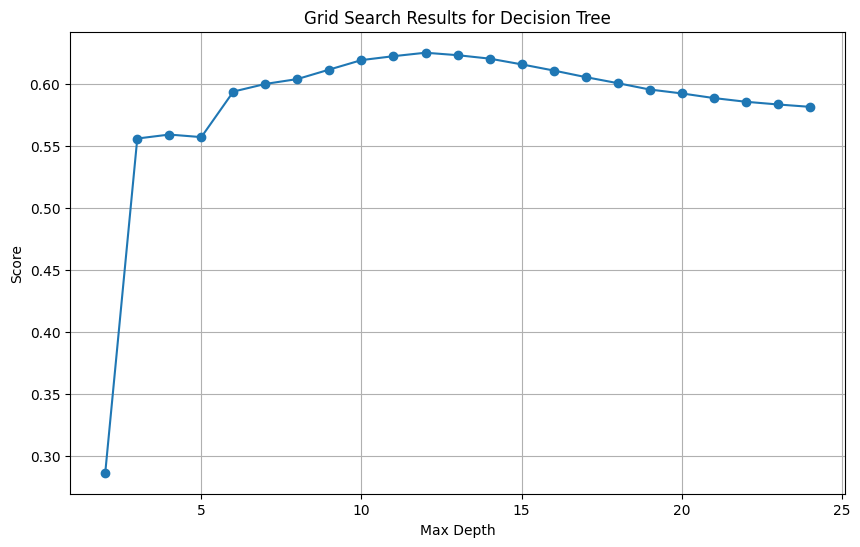

In [71]:
results = grid_search.cv_results_
max_depth_values = results['param_classifier__max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [72]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_f_score = grid_search.best_score_

In [73]:
best_params

{'classifier__max_depth': 12}

In [74]:
best_f_score

0.6253276012563168

In [75]:
y_pred = best_model.predict(X_test)
tree_report_test = classification_report(y_test, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.92      0.67      0.77     31710
           1       0.55      0.65      0.60     17682
           2       0.83      0.81      0.82     17353
           3       0.20      0.68      0.31      2461

    accuracy                           0.70     69206
   macro avg       0.63      0.70      0.63     69206
weighted avg       0.78      0.70      0.72     69206



In [76]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Depart_time', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_South Holland',
       'Departure_area_Utrecht', 'Background_Dutch',
       'Background_Western migration', 'Motive_Go to/return from work',
       'Motive_Other', 'Motive_Social and recreational', 'Motive_Visits',
       'Household_composition_Couple',
       'Household_composition_One person household',
       'Household_composition_Other', 'Education_Higher education',
       'Education_Other'],
      dtype='object')

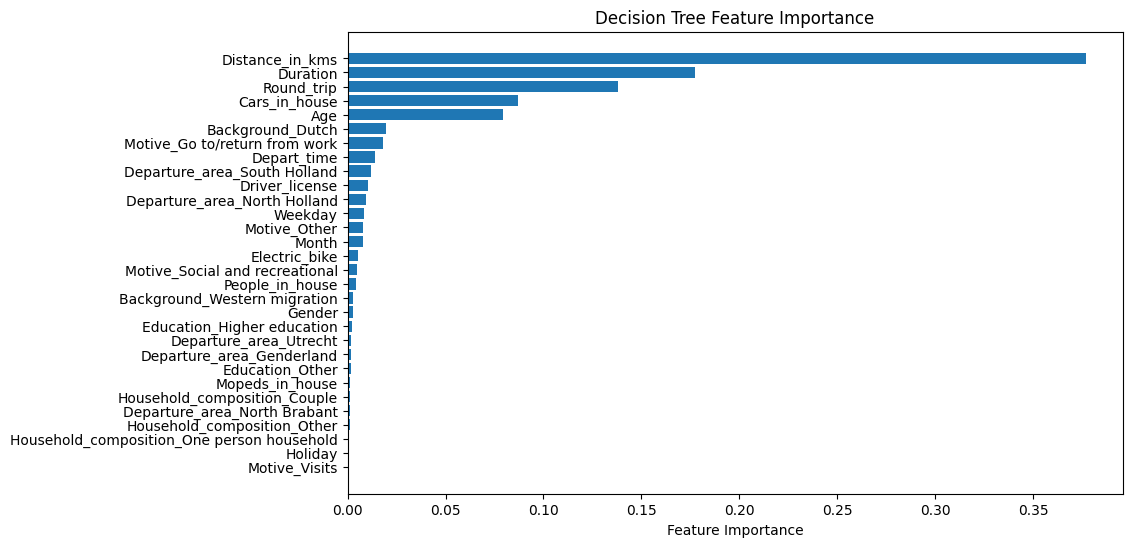

In [77]:
decision_tree_classifier = best_model.named_steps['classifier']

feature_importances = decision_tree_classifier.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Depart_time', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_South Holland',
       'Departure_area_Utrecht', 'Background_Dutch',
       'Background_Western migration', 'Motive_Go to/return from work',
       'Motive_Other', 'Motive_Social and recreational', 'Motive_Visits',
       'Household_composition_Couple',
       'Household_composition_One person household',
       'Household_composition_Other', 'Education_Higher education',
       'Education_Other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

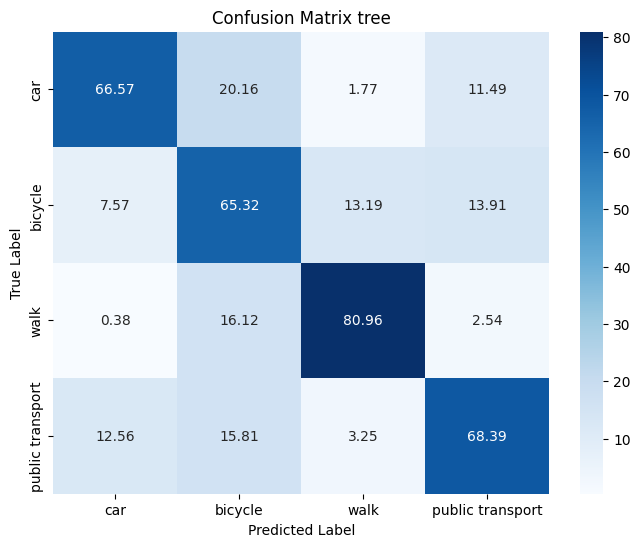

In [78]:
class_labels = ["car", "bicycle", "walk", "public transport"]
conf_matrix_dt = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_dt) / conf_matrix_dt.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_dt.T / conf_matrix_dt.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [79]:
class_labels_mapping = {
    0: 'car',
    1: 'bike',
    2: 'walk',
    3: 'public transport'
}

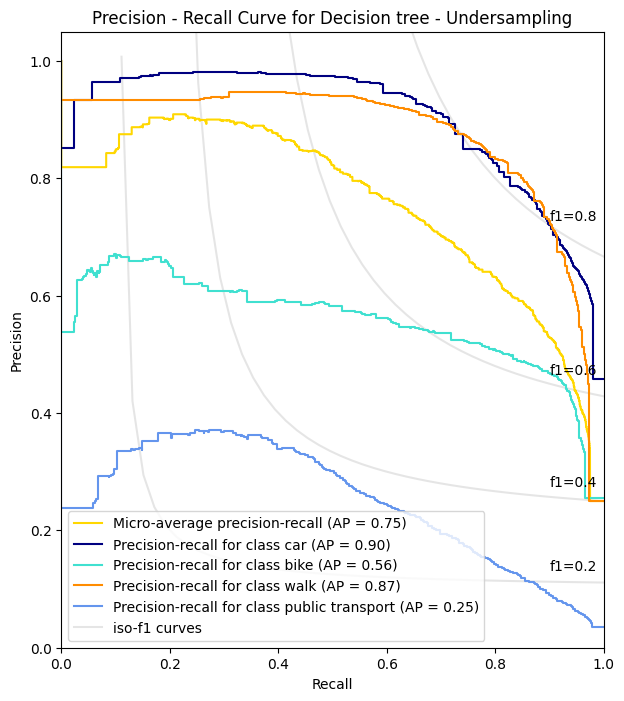

In [80]:
class_probabilities_tree = best_model.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
y_test_bin_tree = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    average_precision[i] = average_precision_score(y_test_bin_tree[:, i], class_probabilities_tree[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_tree.ravel(), class_probabilities_tree.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_tree, class_probabilities_tree, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Decision tree - Undersampling")

plt.show()

# Random Forest

In [81]:
X.shape

(692055, 30)

In [83]:
pipeline = Pipeline(steps = [
    ('sampler', RandomUnderSampler(random_state=42, sampling_strategy = "auto")),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [84]:
param_grid = {
    'classifier__max_features' : list(range(2, 20))
}
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_features': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19]},
             scoring='f1_macro')

In [85]:
best_params = grid_search_rf.best_params_
print(best_params)

{'classifier__max_features': 10}


In [86]:
best_score = grid_search_rf.best_score_
print(best_score)

0.6693117791239448


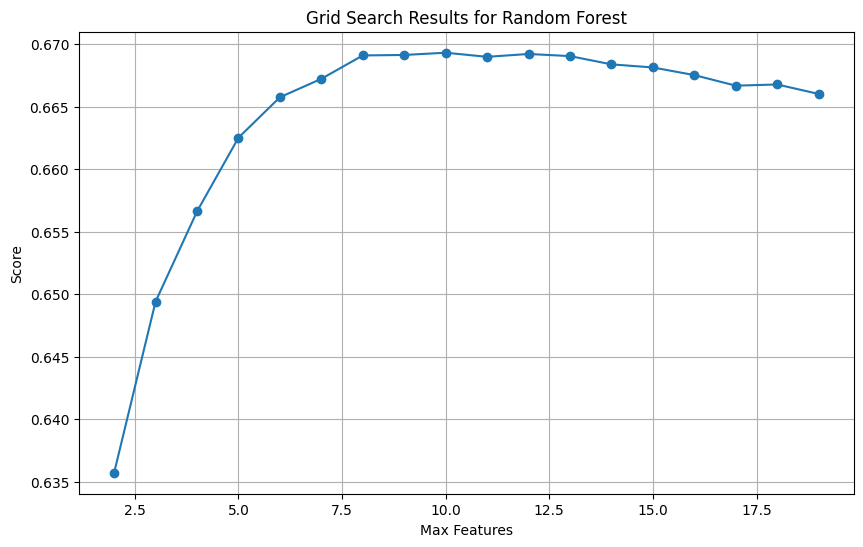

In [87]:
results = grid_search_rf.cv_results_
max_depth_values = results['param_classifier__max_features'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Random Forest')
plt.xlabel('Max Features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [89]:
param_grid = {
    'classifier__n_estimators' : [300, 400, 500],
    'classifier__max_features' : [8, 9, 10]
}
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_features': [8, 9, 10],
                         'classifier__n_estimators': [300, 400, 500]},
             scoring='f1_macro')

In [90]:
best_params = grid_search_rf.best_params_
print(best_params)

{'classifier__max_features': 10, 'classifier__n_estimators': 500}


In [91]:
best_score = grid_search_rf.best_score_
print(best_score)

0.6713154758035597


In [92]:
best_model = grid_search_rf.best_estimator_
y_pred = best_model.predict(X_test)
tree_report_test = classification_report(y_test, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.93      0.72      0.81     31710
           1       0.61      0.66      0.64     17682
           2       0.83      0.87      0.85     17353
           3       0.26      0.78      0.39      2461

    accuracy                           0.75     69206
   macro avg       0.66      0.76      0.67     69206
weighted avg       0.80      0.75      0.76     69206



In [93]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Depart_time', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_South Holland',
       'Departure_area_Utrecht', 'Background_Dutch',
       'Background_Western migration', 'Motive_Go to/return from work',
       'Motive_Other', 'Motive_Social and recreational', 'Motive_Visits',
       'Household_composition_Couple',
       'Household_composition_One person household',
       'Household_composition_Other', 'Education_Higher education',
       'Education_Other'],
      dtype='object')

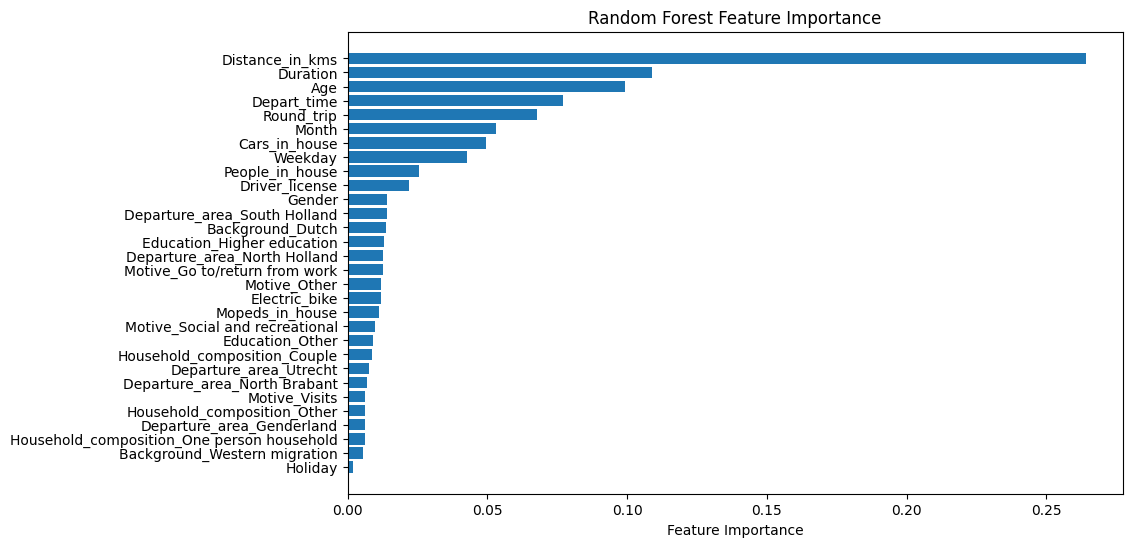

In [94]:
rf = best_model.named_steps['classifier']

feature_importances = rf.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Depart_time', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_South Holland',
       'Departure_area_Utrecht', 'Background_Dutch',
       'Background_Western migration', 'Motive_Go to/return from work',
       'Motive_Other', 'Motive_Social and recreational', 'Motive_Visits',
       'Household_composition_Couple',
       'Household_composition_One person household',
       'Household_composition_Other', 'Education_Higher education',
       'Education_Other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

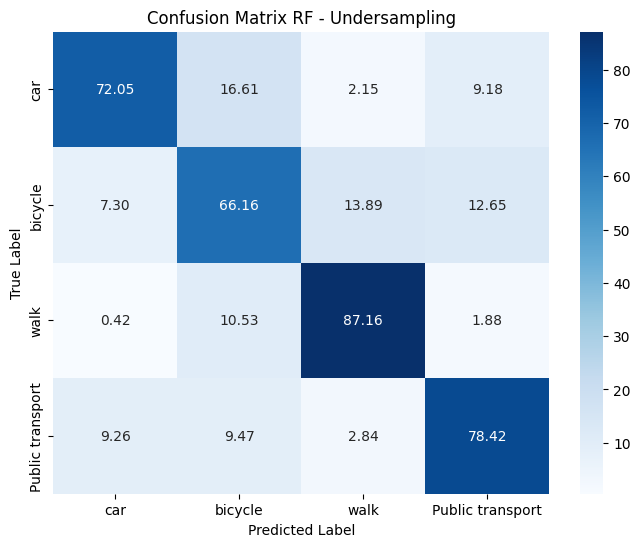

In [95]:
class_labels = ["car", "bicycle", "walk", "Public transport"]
conf_matrix_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_rf) / conf_matrix_rf.sum(axis=1)
conf_matrix_percentages_rf = (conf_matrix_rf.T / conf_matrix_rf.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_rf, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF - Undersampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

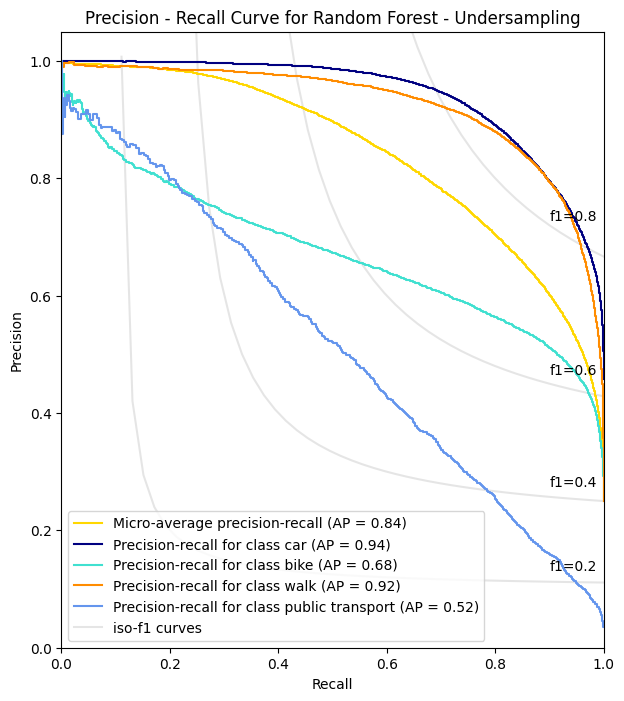

In [96]:
class_probabilities_rf = best_model.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)
y_test_bin_rf = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    average_precision[i] = average_precision_score(y_test_bin_rf[:, i], class_probabilities_rf[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_rf.ravel(), class_probabilities_rf.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_rf, class_probabilities_rf, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Random Forest - Undersampling")

plt.show()

# XGBoost

In [97]:
pipeline = Pipeline(steps = [
    ('sampler', RandomUnderSampler(random_state=42, sampling_strategy = "auto")),
    ('classifier', xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42))
])

In [98]:
param_grid = {
    'classifier__colsample_bytree' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_po...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None, num_class=4,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'classifier__colsample_bytree': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1]},
             scoring='f1_macro')

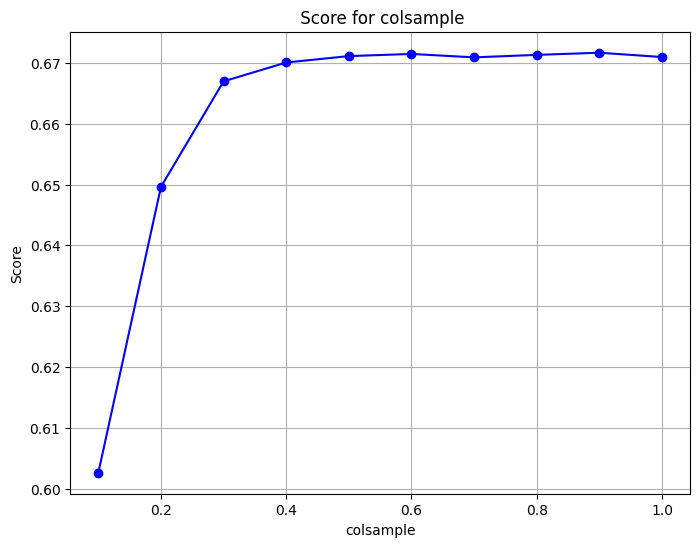

In [99]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__colsample_bytree']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for colsample')
plt.xlabel('colsample')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [100]:
param_grid = {
    'classifier__subsample' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

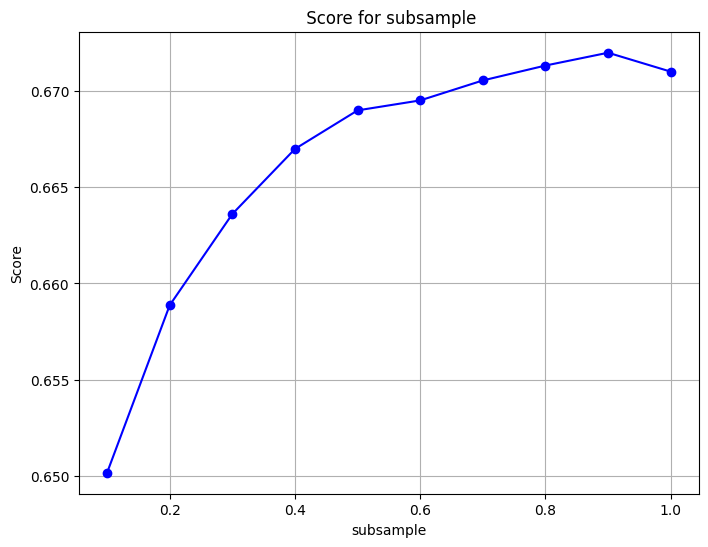

In [101]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__subsample']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for subsample')
plt.xlabel('subsample')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [102]:
param_grid = {
    'classifier__learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

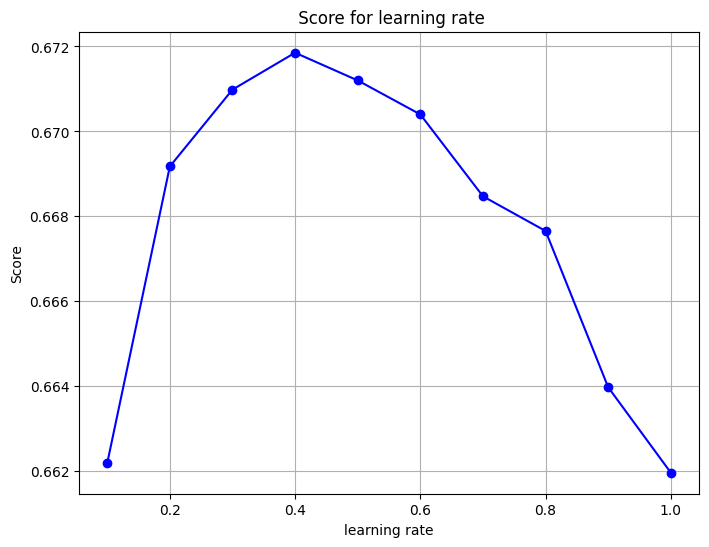

In [103]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__learning_rate']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for learning rate')
plt.xlabel('learning rate')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [104]:
param_grid = {
    'classifier__learning_rate' : [0.3, 0.4, 0.5],
    'classifier__subsample' : [0.8, 0.9], 
    'classifier__n_estimators' : [350, 450, 550],
    'classifier__colsample_bytree' : [0.5, 0.6, 0.7]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
print(best_params_xgb)

{'classifier__colsample_bytree': 0.5, 'classifier__learning_rate': 0.3, 'classifier__n_estimators': 350, 'classifier__subsample': 0.9}


In [105]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
xgbreport = classification_report(y_test, y_pred)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.93      0.73      0.82     31710
           1       0.62      0.68      0.65     17682
           2       0.83      0.86      0.84     17353
           3       0.27      0.77      0.40      2461

    accuracy                           0.75     69206
   macro avg       0.66      0.76      0.68     69206
weighted avg       0.80      0.75      0.77     69206



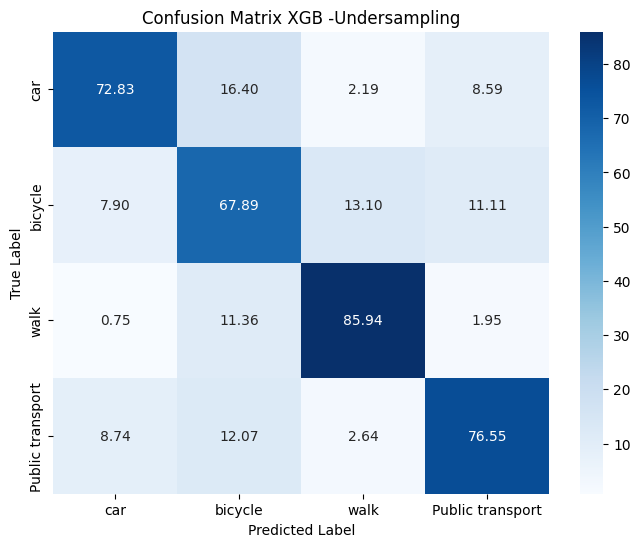

In [106]:
class_labels = ["car", "bicycle", "walk", "Public transport"]
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_xgb) / conf_matrix_xgb.sum(axis=1)
conf_matrix_percentages_xgb = (conf_matrix_xgb.T / conf_matrix_xgb.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_xgb, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix XGB -Undersampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

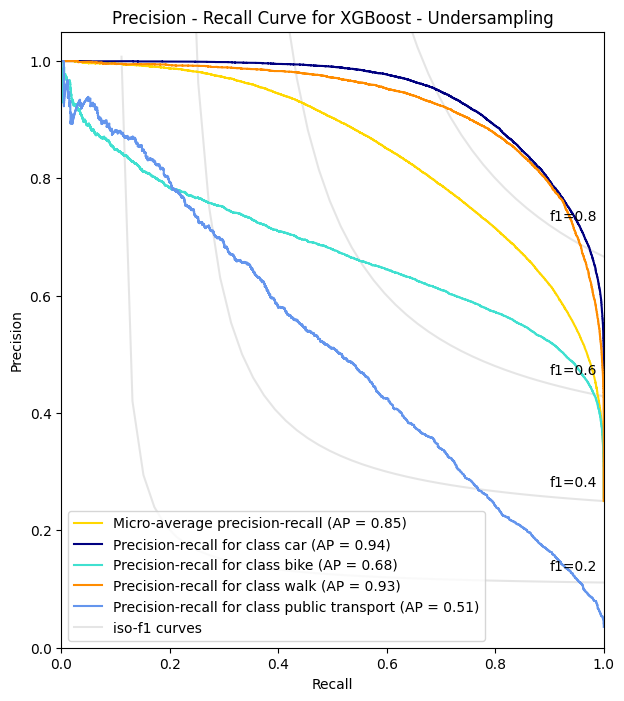

In [107]:
class_probabilities_xgb = best_model.predict_proba(X_test)
y_pred_prob_xgb = np.argmax(class_probabilities_xgb, axis=1)
y_test_bin_xgb = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])
    average_precision[i] = average_precision_score(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_xgb.ravel(), class_probabilities_xgb.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_xgb, class_probabilities_xgb, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for XGBoost - Undersampling")

plt.show()

In [108]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Depart_time', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_South Holland',
       'Departure_area_Utrecht', 'Background_Dutch',
       'Background_Western migration', 'Motive_Go to/return from work',
       'Motive_Other', 'Motive_Social and recreational', 'Motive_Visits',
       'Household_composition_Couple',
       'Household_composition_One person household',
       'Household_composition_Other', 'Education_Higher education',
       'Education_Other'],
      dtype='object')

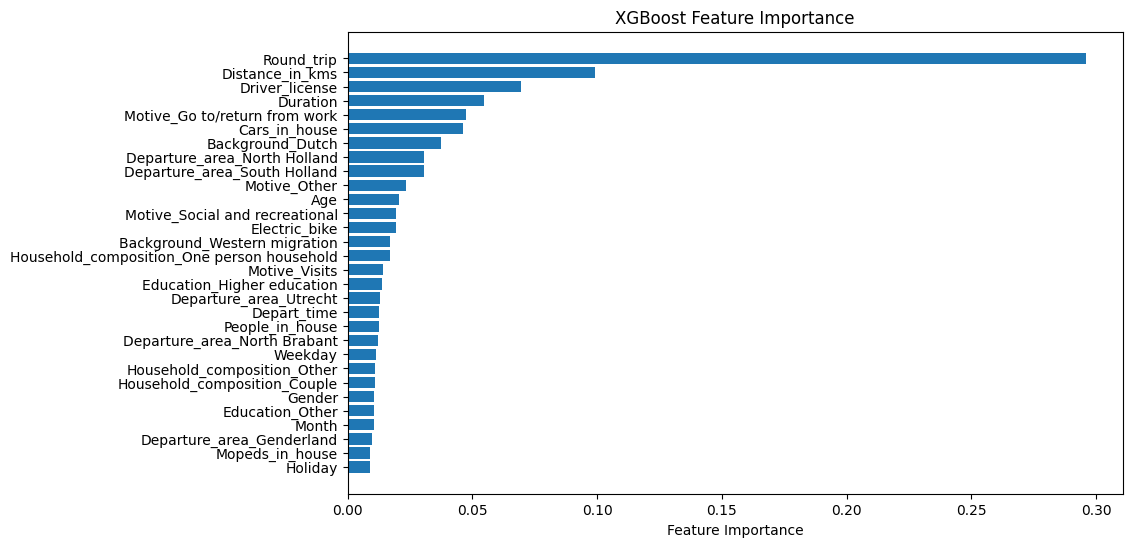

In [109]:
rf = best_model.named_steps['classifier']

feature_importances = rf.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Depart_time', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_South Holland',
       'Departure_area_Utrecht', 'Background_Dutch',
       'Background_Western migration', 'Motive_Go to/return from work',
       'Motive_Other', 'Motive_Social and recreational', 'Motive_Visits',
       'Household_composition_Couple',
       'Household_composition_One person household',
       'Household_composition_Other', 'Education_Higher education',
       'Education_Other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()